In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np

In [2]:
import sys
sys.path.append('/home/db194/mom6_notebooks/helpers/')
from plot_helpers import *

In [3]:
dir = '/scratch/db194/mom6/mar2025/NW2/'

output_dir = 'output/'

In [5]:
exp_dir = 'bare/'
#ds_HR_snapshots = xr.open_mfdataset(dir + exp_dir + output_dir +'snapshots_*.nc', 
#                                   decode_times=False)

stats_HR = xr.open_dataset(dir + exp_dir + output_dir +'ocean.stats.nc')

In [6]:
stats_HR['Time'] = stats_HR['Time'].dt.days

In [6]:
exp_dir = 'ANN_C0/'
#ds_C0_snapshots = xr.open_mfdataset(dir + exp_dir  +'snapshots*.nc', 
#                                   decode_times=False)
stats_C0 = xr.open_dataset(dir + exp_dir  +'ocean.stats.nc')

In [6]:
exp_dir = 'ANN_Cp2/'
#ds_Cp2_snapshots = xr.open_mfdataset(dir + exp_dir  +'snapshots*.nc', 
#                                   decode_times=False)
stats_Cp2 = xr.open_dataset(dir + exp_dir  +'ocean.stats.nc')

In [7]:
exp_dir = 'ANN_Cp2_hmin5/'
#ds_Cp2_snapshots = xr.open_mfdataset(dir + exp_dir  +'snapshots*.nc', 
#                                   decode_times=False)
stats_Cp2_hmin5 = xr.open_dataset(dir + exp_dir  +'ocean.stats.nc')

In [4]:
exp_dir = 'ANN_Cp3_hmin5/'
#ds_Cp3_snapshots = xr.open_mfdataset(dir + exp_dir  +'snapshots*.nc', 
#                                   decode_times=False)
stats_Cp3_1 = xr.open_dataset(dir + exp_dir  +'ocean.stats_30000_31000.nc')
stats_Cp3_1['Time'] = stats_Cp3_1['Time'].dt.days
stats_Cp3_2 = xr.open_dataset(dir + exp_dir  +'ocean.stats_31001_33000.nc')
stats_Cp3_2['Time'] = stats_Cp3_2['Time'].dt.days
stats_Cp3_3 = xr.open_dataset(dir + exp_dir  +'ocean.stats.nc')
stats_Cp3_3['Time'] = stats_Cp3_3['Time'].dt.days

ERROR 1: PROJ: proj_create_from_database: Open of /ext3/miniforge/share/proj failed


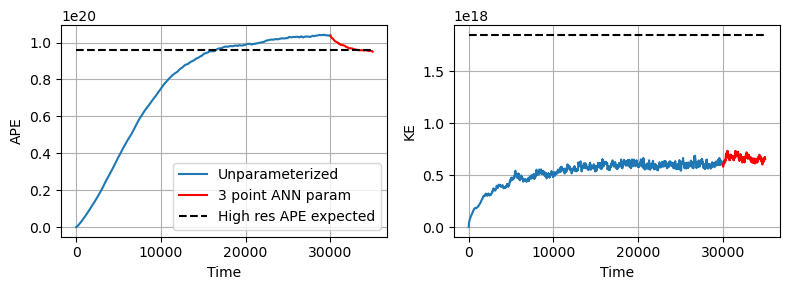

In [10]:
plt.figure(figsize=(8,3))

plt.subplot(121)
stats_HR.APE.sum('Interface')[0:].plot(label='Unparameterized')
stats_Cp3_1.APE.sum('Interface').plot(color='r', label='3 point ANN param')
stats_Cp3_2.APE.sum('Interface').plot(color='r')
stats_Cp3_3.APE.sum('Interface').plot(color='r')
#stats_Cp3_2.APE.sum('Interface').plot()
plt.grid()
plt.hlines(9.58e19, 0, 35000, linestyles='--', color='k', label='High res APE expected')
#plt.ylim([.96e20, 1.05e20])
plt.legend()


plt.subplot(122)
stats_HR.KE.sum('Layer')[0:].plot(label='Unparameterized')
stats_Cp3_1.KE.sum('Layer').plot(color='r', label='3 point ANN param')
stats_Cp3_2.KE.sum('Layer').plot(color='r')
stats_Cp3_3.KE.sum('Layer').plot(color='r')
#stats_Cp3_2.APE.sum('Interface').plot()
plt.grid()
plt.hlines(1.85e18, 0, 35000, linestyles='--', color='k', label='Target')
#plt.ylim([.96e20, 1.05e20])
#plt.legend()
plt.tight_layout()

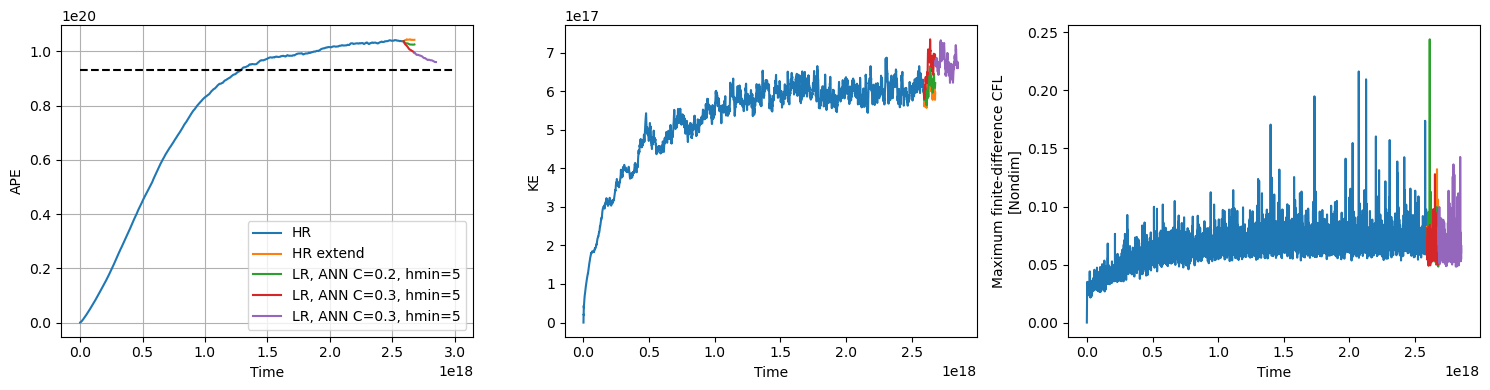

In [21]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
stats_HR.APE.sum('Interface').plot(label='HR')
stats_C0.APE.sum('Interface').plot(label='HR extend')
#stats_Cp2.APE.sum('Interface').plot(label='LR, ANN C=0.2, hmin=1')
stats_Cp2_hmin5.APE.sum('Interface').plot(label='LR, ANN C=0.2, hmin=5')
#stats_Cp3.APE.sum('Interface').plot(label='LR, ANN C=0.3, hmin=5')
stats_Cp3_1.APE.sum('Interface').plot(label='LR, ANN C=0.3, hmin=5')
stats_Cp3_2.APE.sum('Interface').plot(label='LR, ANN C=0.3, hmin=5')
plt.grid()
plt.hlines(9.3e19, 0, 3e18, linestyles='--', color='k')

#plt.ylim([.96e20, 1.05e20])
plt.legend()

plt.subplot(133)
stats_HR.max_CFL_lin.plot()
stats_C0.max_CFL_lin.plot()
#stats_Cp2.max_CFL_lin.plot()
stats_Cp2_hmin5.max_CFL_lin.plot()
stats_Cp3_1.max_CFL_lin.plot()
stats_Cp3_2.max_CFL_lin.plot()

plt.subplot(132)
stats_HR.KE.sum('Layer').plot()
stats_C0.KE.sum('Layer').plot()
#stats_Cp2.KE.sum('Layer').plot()
stats_Cp2_hmin5.KE.sum('Layer').plot()
stats_Cp3_1.KE.sum('Layer').plot()
stats_Cp3_2.KE.sum('Layer').plot()

plt.tight_layout()

In [22]:
import glob
files = sorted(glob.glob(dir + exp_dir  + "snapshots_*.nc")) 
ds_Cp3_snapshots = xr.open_mfdataset(files, 
                                   decode_times=False)

In [23]:
ds_Cp3_snapshots

<xarray.Dataset>
Dimensions:  (xq: 241, yh: 560, zl: 15, time: 600, xh: 240, yq: 561, zi: 16)
Coordinates:
  * xq       (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.0 59.25 59.5 59.75 60.0
  * yh       (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 3e+04 3.001e+04 3.002e+04 ... 3.3e+04 3.3e+04
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * yq       (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.25 69.5 69.75 70.0
  * zi       (zi) float64 1.022e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
Data variables: (12/17)
    u        (time, zl, yh, xq) float64 dask.array<chunksize=(5, 15, 560, 241), meta=np.ndarray>
    v        (time, zl, yq, xh) float64 dask.array<chunksize=(5, 15, 561, 240), meta=np.ndarray>
    uh       (time, zl, yh, xq) float64 dask.array<chunksize=(5, 15, 560, 241), meta=np.ndarray>
    vh       (time, zl, yq, xh) float64 dask.array<chunksize=(5, 15, 561, 240), meta=np.ndarray>
    h        (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    e        (time, zi, yh, xh) float64 dask.array<chunksize=(5, 16, 560, 240), meta=np.ndarray>
    ...       ...
    dudy     (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    dvdx     (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    Fx       (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    Fy       (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    uhTrANN  (time, zl, yh, xq) float64 dask.array<chunksize=(5, 15, 560, 241), meta=np.ndarray>
    vhTrANN  (time, zl, yq, xh) float64 dask.array<chunksize=(5, 15, 561, 240), meta=np.ndarray>
Attributes:
    filename:          snapshots_00030005.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [24]:
def APE(interface):
    '''
    Returns APE in units of kinetic energy per unit mass, i.e.
    m^3/s^2
    '''
    interface_rest = xr.DataArray([    0.,   -25.,   -75.,  -175.,  -300.,  -450.,  -625.,  -825.,
       -1050., -1300., -1600., -1950., -2350., -2850., -3400., -4000.], dims='zi')
    g = xr.DataArray([1.0e+01, 2.1e-03, 3.9e-03, 5.4e-03, 5.8e-03, 5.8e-03, 5.7e-03,
       5.3e-03, 4.8e-03, 4.2e-03, 3.7e-03, 3.1e-03, 2.4e-03, 1.7e-03,
       1.1e-03, 0.0e+00], dims='zi')
    
    coordinate_of_bottom = interface.isel(zi=-1).drop_vars(['zi'])
    
    hint = interface - interface_rest
    
    # Where bottom is upper than the rest interface
    hbot = np.maximum(coordinate_of_bottom - interface_rest,0)
    
    APE_instant = (0.5 * g * (hint**2))
    APE_constant = (0.5 * g * (hbot**2))
    
    return (APE_instant - APE_constant).sum('zi')

In [25]:
ape = APE(ds_Cp3_snapshots.e) 

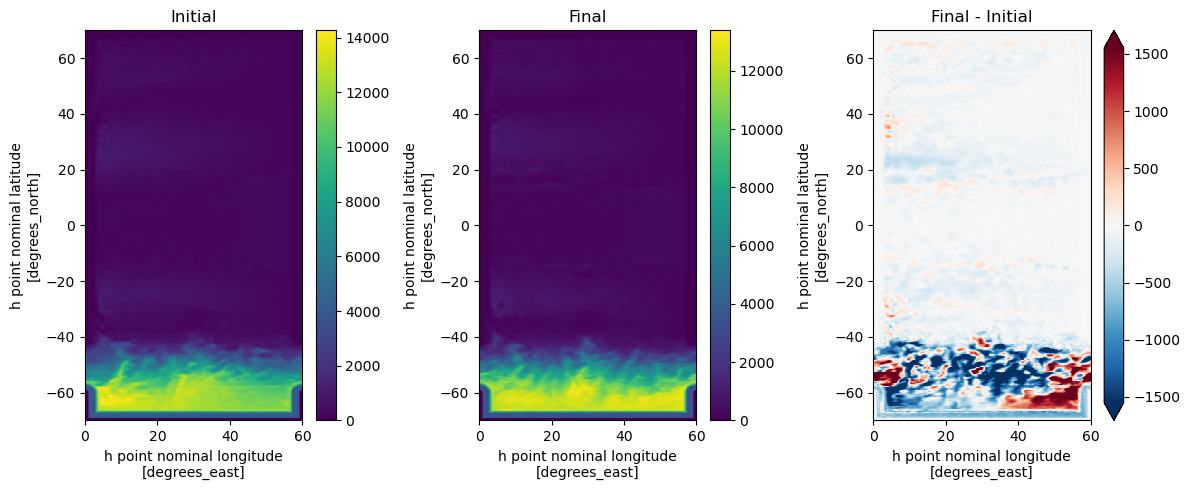

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(131)
ape.isel(time=0).plot()
plt.title('Initial')

plt.subplot(132)
ape.isel(time=-1).plot()
plt.title('Final')

plt.subplot(133)
(ape.isel(time=-1) - ape.isel(time=0)).plot(robust=True)
plt.title('Final - Initial')

plt.tight_layout()

In [27]:
ape_change = ( ape.isel(time=slice(-72,None)).mean('time') - ape.isel(time=slice(0,50)).mean('time') )
ape_change.load();


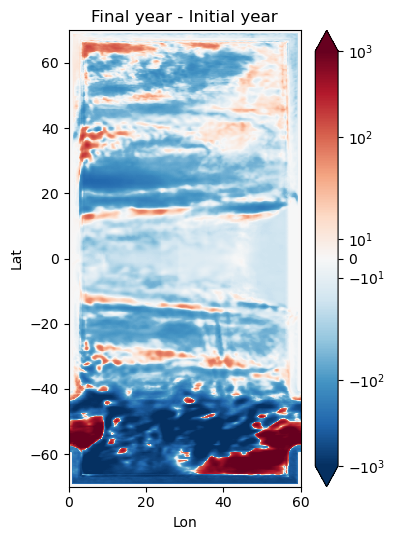

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

plt.figure(figsize=(4, 5.5))

ape_change.plot(
    norm=SymLogNorm(linthresh=50, vmin=-1000, vmax=1000),
    cmap='RdBu_r'  # or another diverging colormap
)

plt.title('Final year - Initial year')
plt.xlabel('Lon')
plt.ylabel('Lat')
plt.tight_layout()
plt.savefig('APE_change.png')

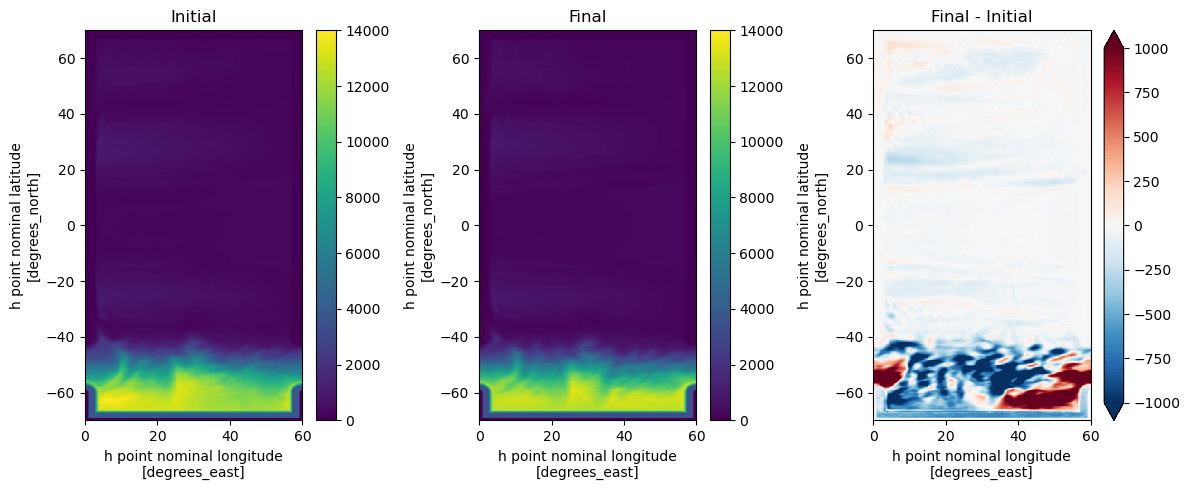

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(131)
ape.isel(time=slice(0,72)).mean('time').plot(vmax=14e3)
plt.title('Initial')

plt.subplot(132)
ape.isel(time=slice(-72,None)).mean('time').plot(vmax=14e3)
plt.title('Final')

plt.subplot(133)
( ape.isel(time=slice(-72,None)).mean('time') - ape.isel(time=slice(0,50)).mean('time') ).plot(vmin=-1000)
plt.title('Final - Initial')

plt.tight_layout()

Text(0.5, 0, 'APE final - initial')

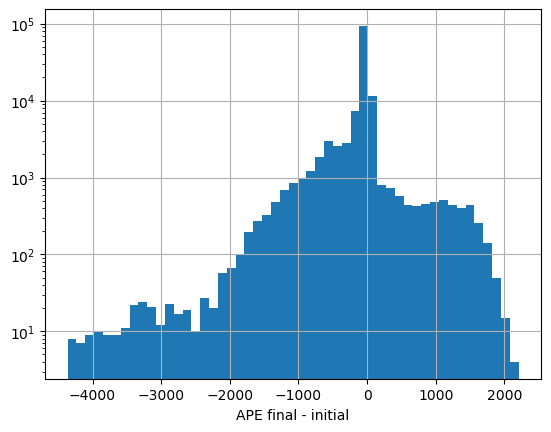

In [25]:
( ape.isel(time=slice(-50,None)).mean('time') - ape.isel(time=slice(0,50)).mean('time') ).plot.hist(bins=51)
plt.yscale('log')
plt.grid()
plt.xlabel('APE final - initial')

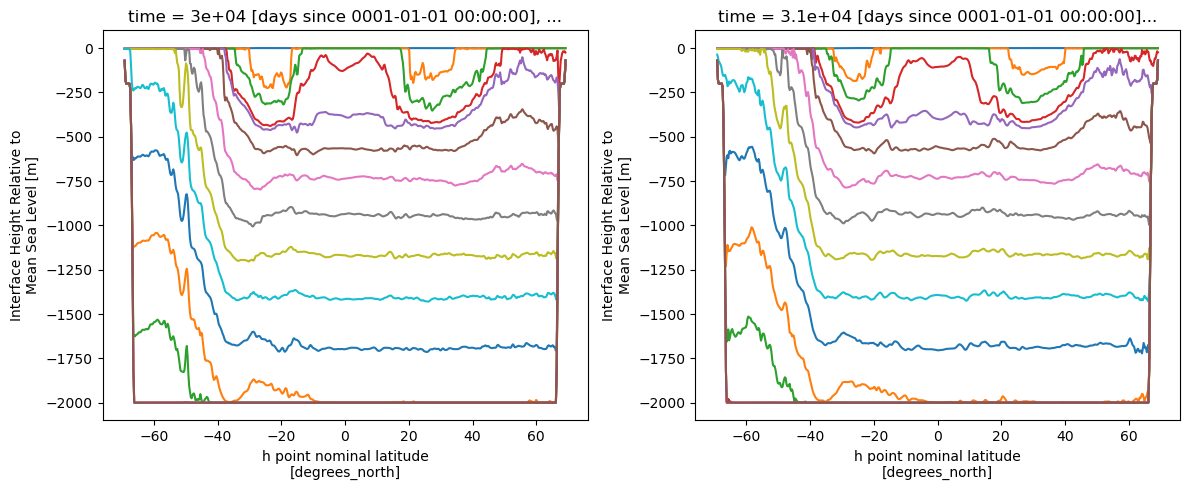

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
for i in range(16):
    ds_Cp3_snapshots.e.isel(time=0, zi = i).sel(xh=30, method='nearest').plot()

plt.subplot(122)
for i in range(16):
    ds_Cp3_snapshots.e.isel(time=-1, zi = i).sel(xh=30, method='nearest').plot()
plt.tight_layout()

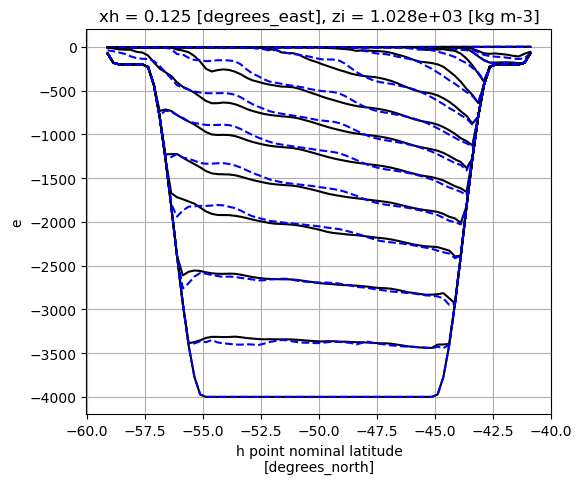

In [12]:
plt.figure(figsize=(6, 5))

for i in range(16):
    ds_Cp3_snapshots.e.isel(time=slice(0,20), zi = i).sel(xh=0, method='nearest').mean('time').plot(color='k')
    ds_Cp3_snapshots.e.isel(time=slice(-20,None), zi = i).sel(xh=0, method='nearest').mean('time').plot(linestyle='--', color='b')

plt.grid()


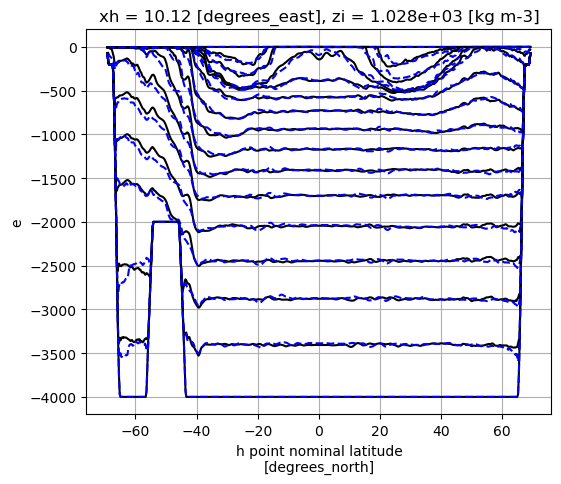

In [13]:
plt.figure(figsize=(6, 5))

for i in range(16):
    ds_Cp3_snapshots.e.isel(time=slice(0,20), zi = i).sel(xh=10, method='nearest').mean('time').plot(color='k')
    ds_Cp3_snapshots.e.isel(time=slice(-20,None), zi = i).sel(xh=10, method='nearest').mean('time').plot(linestyle='--', color='b')

plt.grid()


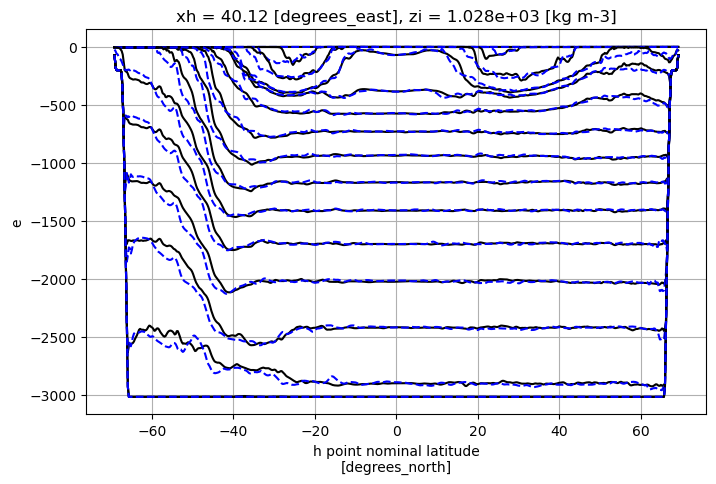

In [14]:
plt.figure(figsize=(8, 5))
xh = 40
for i in range(16):
    ds_Cp3_snapshots.e.isel(time=slice(0,20), zi = i).sel(xh=xh, method='nearest').mean('time').plot(color='k')
    ds_Cp3_snapshots.e.isel(time=slice(-20,None), zi = i).sel(xh=xh, method='nearest').mean('time').plot(linestyle='--', color='b')

plt.grid()


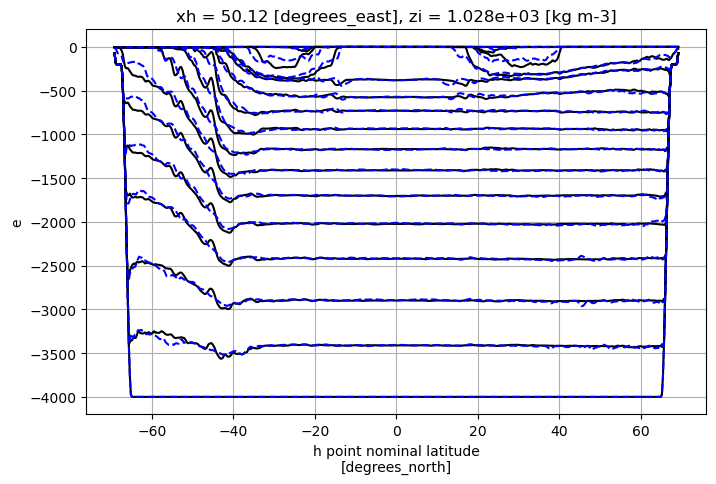

In [15]:
plt.figure(figsize=(8, 5))
xh = 50
for i in range(16):
    ds_Cp3_snapshots.e.isel(time=slice(0,20), zi = i).sel(xh=xh, method='nearest').mean('time').plot(color='k')
    ds_Cp3_snapshots.e.isel(time=slice(-20,None), zi = i).sel(xh=xh, method='nearest').mean('time').plot(linestyle='--', color='b')

plt.grid()



In [18]:
from xgcm import Grid

grid = Grid(ds_Cp3_snapshots)

In [20]:
ds_Cp3_snapshots

<xarray.Dataset>
Dimensions:  (xq: 241, yh: 560, zl: 15, time: 200, xh: 240, yq: 561, zi: 16)
Coordinates:
  * xq       (xq) float64 0.0 0.25 0.5 0.75 1.0 ... 59.0 59.25 59.5 59.75 60.0
  * yh       (yh) float64 -69.88 -69.62 -69.38 -69.12 ... 69.38 69.62 69.88
  * zl       (zl) float64 1.023e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
  * time     (time) float64 3e+04 3.001e+04 3.002e+04 ... 3.1e+04 3.1e+04
  * xh       (xh) float64 0.125 0.375 0.625 0.875 ... 59.12 59.38 59.62 59.88
  * yq       (yq) float64 -70.0 -69.75 -69.5 -69.25 ... 69.25 69.5 69.75 70.0
  * zi       (zi) float64 1.022e+03 1.023e+03 1.023e+03 ... 1.028e+03 1.028e+03
Data variables: (12/17)
    u        (time, zl, yh, xq) float64 dask.array<chunksize=(5, 15, 560, 241), meta=np.ndarray>
    v        (time, zl, yq, xh) float64 dask.array<chunksize=(5, 15, 561, 240), meta=np.ndarray>
    uh       (time, zl, yh, xq) float64 dask.array<chunksize=(5, 15, 560, 241), meta=np.ndarray>
    vh       (time, zl, yq, xh) float64 dask.array<chunksize=(5, 15, 561, 240), meta=np.ndarray>
    h        (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    e        (time, zi, yh, xh) float64 dask.array<chunksize=(5, 16, 560, 240), meta=np.ndarray>
    ...       ...
    dudy     (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    dvdx     (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    Fx       (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    Fy       (time, zl, yh, xh) float64 dask.array<chunksize=(5, 15, 560, 240), meta=np.ndarray>
    uhTrANN  (time, zl, yh, xq) float64 dask.array<chunksize=(5, 15, 560, 241), meta=np.ndarray>
    vhTrANN  (time, zl, yq, xh) float64 dask.array<chunksize=(5, 15, 561, 240), meta=np.ndarray>
Attributes:
    filename:          snapshots_00030005.nc
    title:             NeverWorld2
    associated_files:  area_t: static.nc
    grid_type:         regular
    grid_tile:         N/A

In [19]:
grid

<xgcm.Grid>

In [23]:
PE_init = ((ds_Cp3_snapshots.e + 4000)**2).isel(time=slice(0,30)).sum('zi').mean('time')
PE_final = ((ds_Cp3_snapshots.e + 4000)**2).isel(time=slice(-30,None)).sum('zi').mean('time')


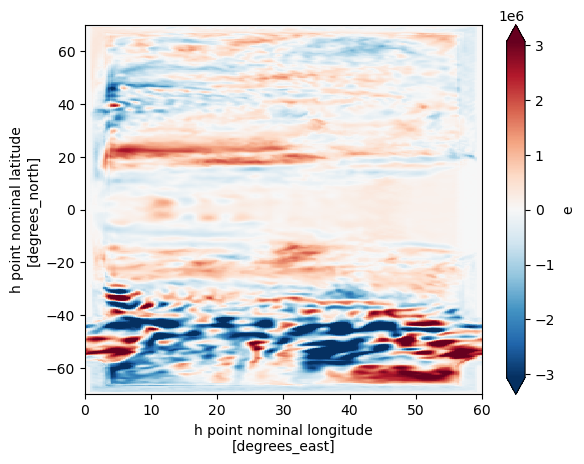

In [24]:
(PE_final - PE_init).plot(robust=True)

In [59]:
KE_init = (ds_Cp3_snapshots.u**2 * ds_Cp3_snapshots.h).isel(time=slice(0,20)).sum('zl').mean('time')
KE_final = (ds_Cp3_snapshots.u**2 * ds_Cp3_snapshots.h).isel(time=slice(-20,None)).sum('zl').mean('time')


In [ ]:
KE_init.plot()

In [ ]:
KE_final.plot()

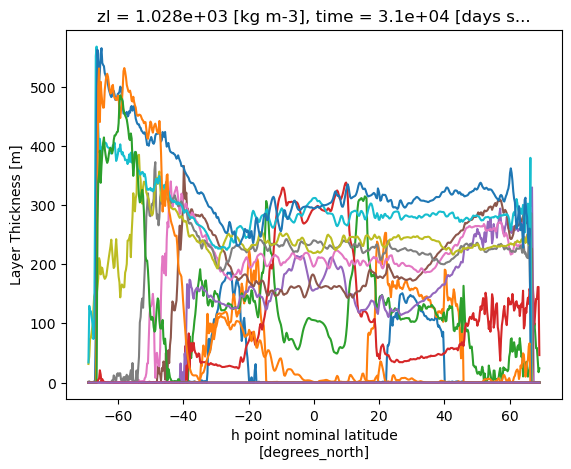

In [31]:
for i in range(15):
    ds_Cp3_snapshots.h.isel(time=-1, zl = i).sel(xh=30, method='nearest').plot()

In [15]:
magGradh = (ds_Cp2_snapshots.dhdx**2 + ds_Cp2_snapshots.dhdy**2) ** 0.5
diss_Cp2 = (ds_Cp2_snapshots.Fx * ds_Cp2_snapshots.dhdx + ds_Cp2_snapshots.Fy * ds_Cp2_snapshots.dhdy)/magGradh

In [16]:
diss_Cp2.load();

In [27]:
magGradh = (ds_C0_snapshots.dhdx**2 + ds_C0_snapshots.dhdy**2) ** 0.5
diss_C0 = (ds_C0_snapshots.Fx * ds_C0_snapshots.dhdx + ds_C0_snapshots.Fy * ds_C0_snapshots.dhdy)/magGradh

In [31]:
diss_C0.load();

/ext3/miniforge/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/ext3/miniforge/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


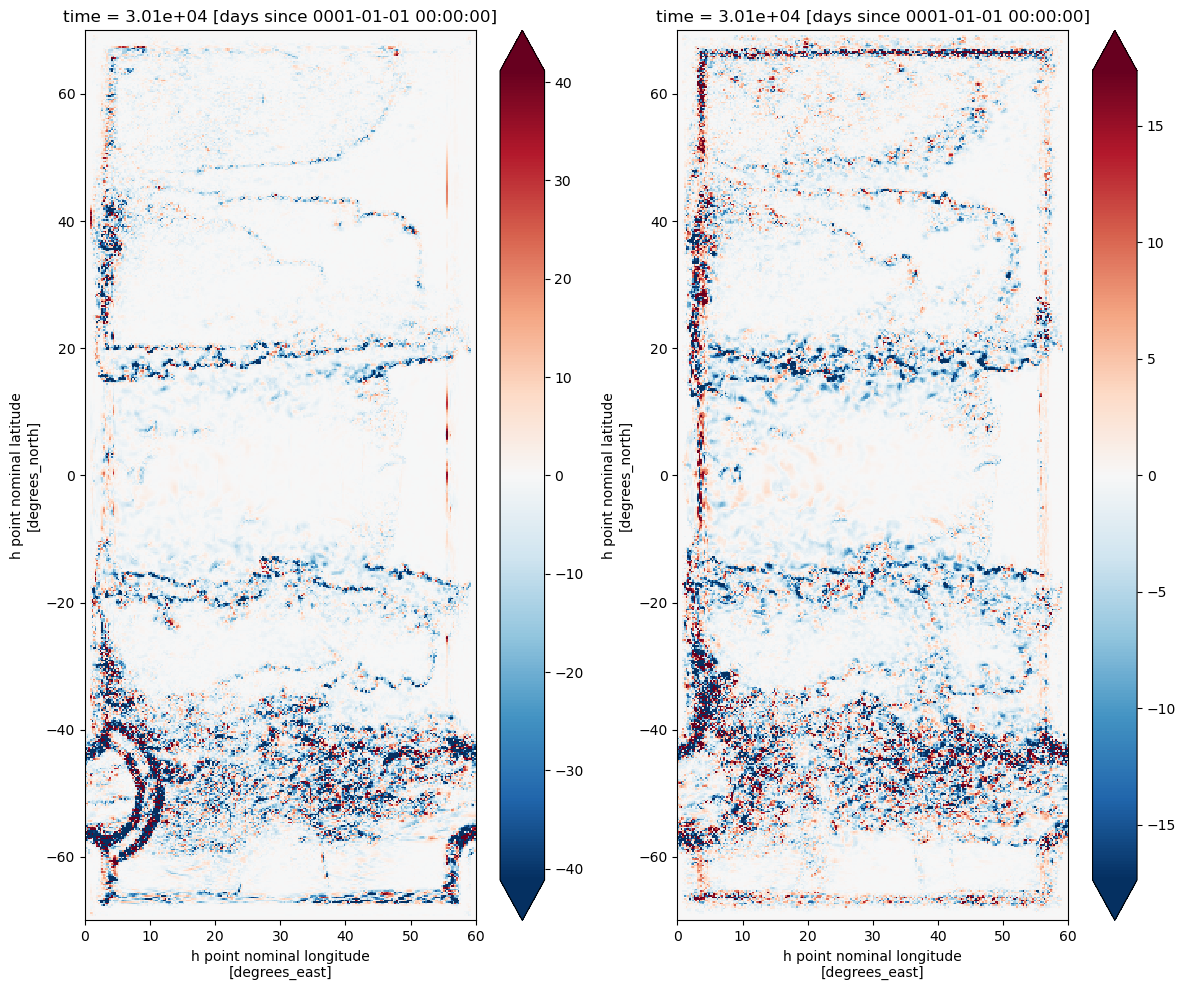

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(1,2,1)
diss_C0.isel(time=-1).sum('zl').plot(robust=True)


plt.subplot(1,2,2)
diss_Cp2.isel(time=-1).sum('zl').plot(robust=True)

plt.tight_layout()

NameError: name 'diss_C0' is not defined

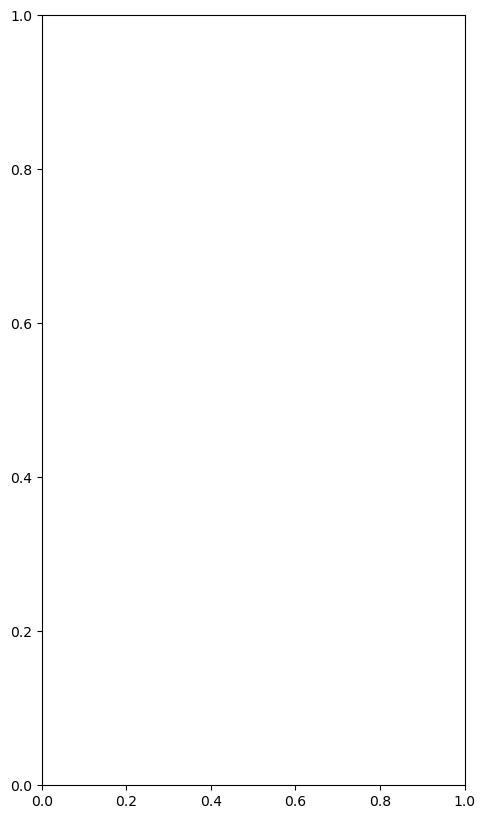

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(1,2,1)
diss_C0.mean('time').sum('zl').plot(robust=True)


plt.subplot(1,2,2)
diss_Cp2.mean('time').sum('zl').plot(robust=True)


plt.tight_layout()

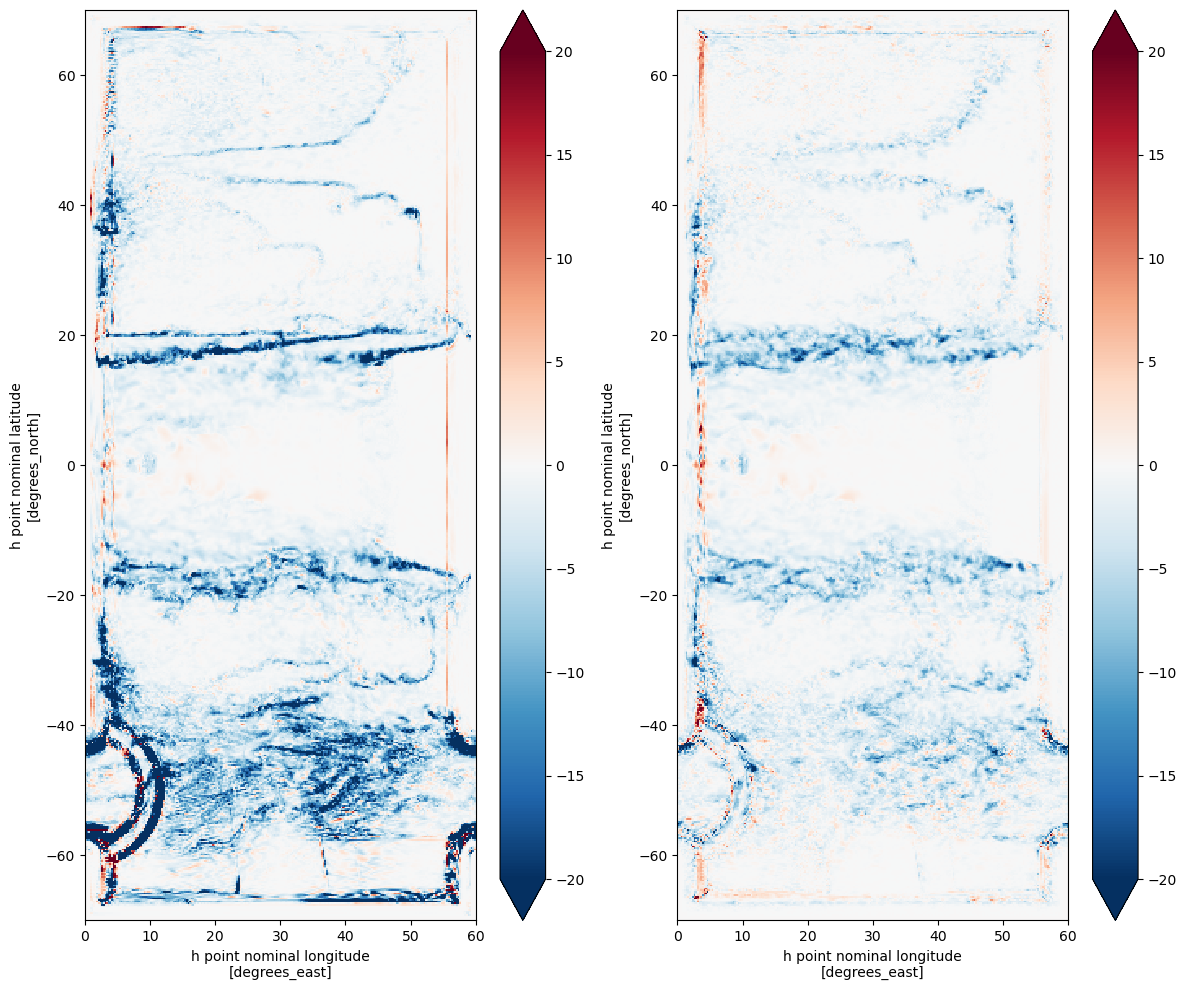

In [34]:
plt.figure(figsize=(12, 10))

vmin = - 20
plt.subplot(1,2,1)
diss_C0.mean('time').sum('zl').plot(vmin=vmin)


plt.subplot(1,2,2)
diss_Cp2.mean('time').sum('zl').plot(vmin=vmin)


plt.tight_layout()

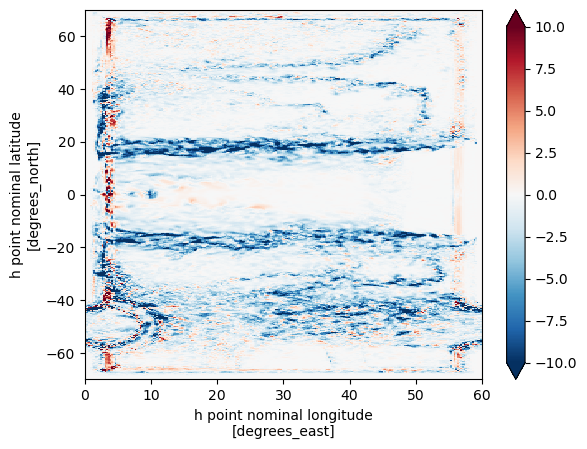

In [36]:
vmin = -10
diss_Cp2.mean('time').sum('zl').plot(vmin=vmin)
